In [1]:
# Install required package
!pip install ucimlrepo --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import random
import json
from google.colab import files


In [2]:

# Fetch the dataset using ucimlrepo
letter_recognition = fetch_ucirepo(id=59)
X = letter_recognition.data.features
y = letter_recognition.data.targets['lettr']  # Target column is 'letter'

# Label encoding for target variable
le = LabelEncoder()
y = le.fit_transform(y)  # A–Z → 0–25

# Generate 10 train-test samples
samples = []
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1, 1000))
    samples.append({'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test})

results = []
best_accuracy = 0
best_sample_index = -1
best_sample_convergence = []
best_result = {}
best_model = None



In [3]:

# SVM optimization over 100 random iterations
for i, sample in enumerate(samples):
    X_train = sample["X_train"]
    y_train = sample["y_train"]
    X_test = sample["X_test"]
    y_test = sample["y_test"]

    best_acc = 0
    best_params = {}
    convergence = []

    for iteration in range(100):
        kernel = random.choice(['linear', 'rbf', 'poly', 'sigmoid'])
        C = 10 ** random.uniform(-2, 2)

        gamma = 'scale'
        degree = 3
        coef0 = 0

        if kernel in ['rbf', 'poly', 'sigmoid']:
            gamma = 10 ** random.uniform(-4, 1)
        if kernel == 'poly':
            degree = random.randint(2, 5)
        if kernel in ['poly', 'sigmoid']:
            coef0 = random.uniform(0, 1)

        model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree, coef0=coef0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        convergence.append(acc)

        if acc > best_acc:
            best_acc = acc
            best_params = {'kernel': kernel, 'C': C, 'gamma': gamma, 'degree': degree, 'coef0': coef0}
            best_model_local = model

    results.append({
        'Sample': i + 1,
        'Best Accuracy': round(best_acc, 4),
        'Best Parameters': best_params
    })

    if best_acc > best_accuracy:
        best_accuracy = best_acc
        best_sample_index = i
        best_sample_convergence = convergence
        best_result = results[-1]
        best_model = best_model_local


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

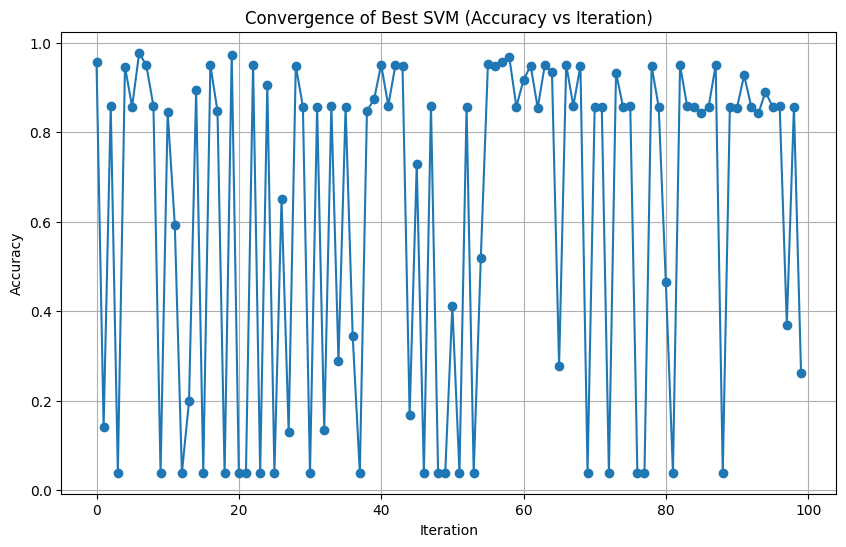

In [4]:

# Save results to files
results_df = pd.DataFrame(results)
results_df.to_csv("svm_results.csv", index=False)

# Plot and save convergence of best sample
plt.figure(figsize=(10, 6))
plt.plot(best_sample_convergence, marker='o')
plt.title("Convergence of Best SVM (Accuracy vs Iteration)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("best_convergence.png")

# Save best hyperparameters
with open("best_hyperparameters.json", "w") as f:
    json.dump(best_result["Best Parameters"], f, indent=4)

# Save evaluation report for best model
y_pred_best = best_model.predict(samples[best_sample_index]["X_test"])
report = classification_report(samples[best_sample_index]["y_test"], y_pred_best, target_names=le.classes_)

with open("best_model_evaluation.txt", "w") as f:
    f.write("Classification Report for Best Model:\n\n")
    f.write(report)

# Download files
files.download("svm_results.csv")
files.download("best_convergence.png")
files.download("best_hyperparameters.json")
files.download("best_model_evaluation.txt")